<a href="https://colab.research.google.com/github/JasmineSingh1/Supervised-Machine-Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240522154643/auto-mpg%5B1%5D.csv'

In [6]:
df = pd.read_csv(url)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


Splitting the X and y, i.e., input features and target variable

In [11]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

In [12]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,4,97.0,52,2130,24.6,82,2,vw pickup
395,4,135.0,84,2295,11.6,82,1,dodge rampage
396,4,120.0,79,2625,18.6,82,1,ford ranger


In [13]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


Beacause linear models like Ridge and Lasso require only numeric featues, we encode the categorical features, if any, in the data being used

The car name column is a text string (e.g., 'chevrolet chevelle malibu') — it's not useful in raw form for regression unless you want to do natural language processing (NLP), which is way beyond typical regression.
So we drop it to avoid errors and noise.

In [14]:
# If there are categorical columns (like origin, car name), encode them:
if 'car name' in X.columns:
    X = X.drop(columns=['car name'])

In [15]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


The origin column in the Auto MPG dataset represents regions (usually as 1, 2, 3 for USA, Europe, Japan). While these are numbers, they represent categories, not quantities — so using them as-is in regression would be misleading.

This transforms the single origin column into multiple binary columns.

drop_first=True drops one of the categories to avoid multicollinearity (a.k.a. the dummy variable trap).

In [16]:
if 'origin' in X.columns:
    X = pd.get_dummies(X, columns=['origin'], drop_first=True)

In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,False,False
1,8,350.0,165,3693,11.5,70,False,False
2,8,318.0,150,3436,11.0,70,False,False
3,8,304.0,150,3433,12.0,70,False,False
4,8,302.0,140,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,False,False
394,4,97.0,52,2130,24.6,82,True,False
395,4,135.0,84,2295,11.6,82,False,False
396,4,120.0,79,2625,18.6,82,False,False


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [19]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
3,8,304.0,150,3433,12.0,70,False,False
18,4,97.0,88,2130,14.5,70,False,True
376,4,91.0,68,2025,18.2,82,False,True
248,4,91.0,60,1800,16.4,78,False,True
177,4,115.0,95,2694,15.0,75,True,False
...,...,...,...,...,...,...,...,...
71,3,70.0,97,2330,13.5,72,False,True
106,8,350.0,180,4499,12.5,73,False,False
270,4,134.0,95,2515,14.8,78,False,True
348,4,89.0,62,2050,17.3,81,False,True


The horsepower column contains non-numeric values ('?'), which is causing an error when trying to scale the data.

In [24]:
# Replace '?' with NaN in the 'horsepower' column
X_train['horsepower'] = X_train['horsepower'].replace('?', np.nan)
X_test['horsepower'] = X_test['horsepower'].replace('?', np.nan)

# Convert the 'horsepower' column to numeric
X_train['horsepower'] = pd.to_numeric(X_train['horsepower'])
X_test['horsepower'] = pd.to_numeric(X_test['horsepower'])

# Fill NaN values with the mean of the 'horsepower' column
X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())
X_test['horsepower'] = X_test['horsepower'].fillna(X_test['horsepower'].mean())

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[ 1.52718818,  1.0901965 ,  1.26234796, ..., -1.6966673 ,
        -0.46232073, -0.51176632],
       [-0.85051483, -0.92299623, -0.41301277, ..., -1.6966673 ,
        -0.46232073,  1.95401684],
       [-0.85051483, -0.98134964, -0.95345171, ...,  1.63897537,
        -0.46232073,  1.95401684],
       ...,
       [-0.85051483, -0.56315019, -0.22385913, ...,  0.52709448,
        -0.46232073,  1.95401684],
       [-0.85051483, -1.00080078, -1.11558339, ...,  1.36100515,
        -0.46232073,  1.95401684],
       [-0.85051483, -0.92299623, -1.54793455, ..., -0.86275663,
         2.16300056, -0.51176632]])

Ridge Regression Model

In [28]:
ridge_regressor = Ridge()

In [29]:
ridge_regressor.fit(X_train_scaled, y_train)

Ridge()

In [30]:
y_predictions_ridge = ridge_regressor.predict(X_test_scaled)

In [31]:
y_predictions_ridge

array([32.39739318, 29.23107572, 21.15941249, 16.83754789, 12.4319608 ,
       26.58533143, 27.62269964,  9.96666263, 16.76839018, 21.52860678,
       12.90547734, 35.81667903, 24.52472019, 13.60950671, 23.54732108,
        6.40192676, 29.21205023, 24.81437238, 16.58591967, 35.91577446,
       24.70229266, 18.62394306, 28.72665127, 28.29258196, 14.92487577,
       35.80633034, 26.46007592, 24.59848899, 21.88304444,  8.90846195,
       28.17501022, 36.11438189, 20.71299523, 25.4865636 , 33.83424488,
       12.09501342, 22.54991346, 21.83354005, 12.29447494, 27.75120586,
       26.04087154, 28.37300528, 21.10755089,  7.13900226, 23.96767713,
       34.64728751, 27.84712399, 25.24831675, 23.39586288, 28.58237484,
       22.15837194, 33.24614419, 32.27822081, 11.04821862, 27.56524243,
       10.10452166, 19.99654911, 29.52371535, 22.67758984, 20.27390977,
       16.23874734, 31.58368535, 23.59012551, 21.42540892, 20.62730854,
       24.92225668, 24.76977698, 32.05333136, 27.55441777, 12.63

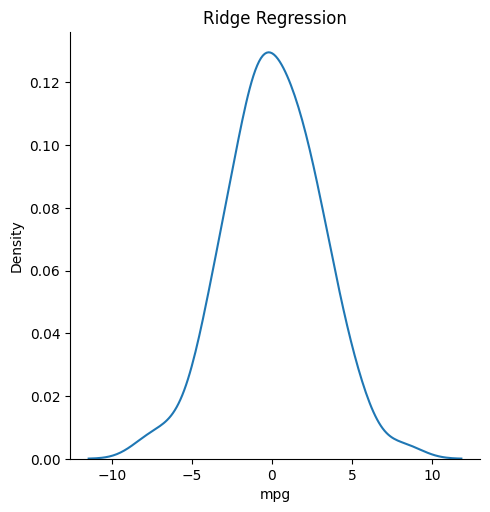

In [39]:
sns.displot(y_test - y_predictions_ridge, kind='kde')
plt.title('Ridge Regression')
plt.show()

Evaluating model performance for ridge regression

In [34]:
mse_ridge = mean_squared_error(y_true = y_test, y_pred = y_predictions_ridge)
r2_ridge = r2_score(y_true = y_test, y_pred = y_predictions_ridge)

print(f"Mean Squared Error for Ridge Regression: {mse_ridge}")
print(f"R-squared Score for Ridge Regression: {r2_ridge}")

Mean Squared Error for Ridge Regression: 8.340740015539142
R-squared Score for Ridge Regression: 0.844870900252927


Using GridSearchCV to find the best combination of parameters that make the model perform best

In [43]:
paramters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, param_grid=paramters, scoring='neg_mean_squared_error', cv=5)

In [44]:
ridgecv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [45]:
print(ridgecv.best_params_)

{'alpha': 2}


In [46]:
y_predictions_ridgecv = ridgecv.predict(X_test_scaled)

In [47]:
y_predictions_ridgecv

array([32.33266047, 29.24311368, 21.09715805, 16.83845603, 12.5065495 ,
       26.58523596, 27.66435825,  9.86921681, 16.87934566, 21.50756455,
       12.79299661, 35.7679693 , 24.50562931, 13.66919411, 23.57963114,
        6.52692005, 29.25770186, 24.87382804, 16.46141592, 35.83076248,
       24.70190614, 18.66193155, 28.5959984 , 28.29393962, 14.92811   ,
       35.62889386, 26.4665229 , 24.63201019, 21.84537769,  8.96860463,
       28.21628451, 35.99167596, 20.57775121, 25.49966115, 33.80637184,
       11.98475749, 22.5857561 , 21.7324365 , 12.41619679, 27.73263572,
       26.05409984, 28.27586207, 21.21926436,  7.17163052, 24.03097471,
       34.56547515, 27.83792619, 25.28735384, 23.40351092, 28.58758549,
       22.15580451, 33.23196445, 32.25189568, 10.97788384, 27.57916317,
       10.08066082, 19.88466541, 29.53921303, 22.67177074, 20.31008429,
       16.12505249, 31.52480559, 23.62994396, 21.50555239, 20.65328728,
       24.95183793, 24.80381871, 32.03270274, 27.52051628, 12.73

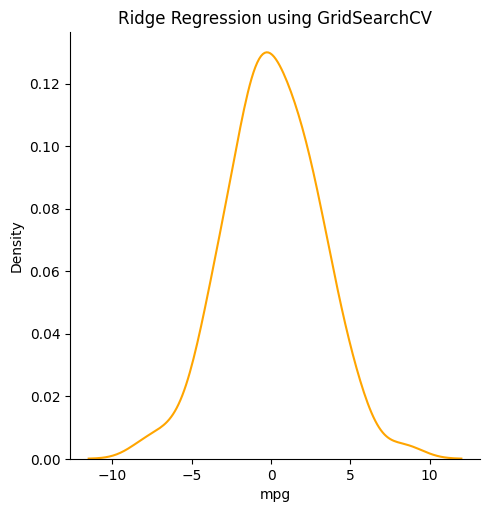

In [53]:
sns.displot(y_test - y_predictions_ridgecv, kind='kde', color= 'orange')
plt.title('Ridge Regression using GridSearchCV')
plt.show()

In [62]:
mse_ridgecv = mean_squared_error(y_true = y_test, y_pred = y_predictions_ridgecv)
r2_ridgecv = r2_score(y_true = y_test, y_pred = y_predictions_ridgecv)

print(f"Mean Squared Error for Ridge Regression using GridSearchCV: {mse_ridgecv}")
print(f"R-squared Score for Ridge Regression using GridSearchCV: {r2_ridgecv}")

Mean Squared Error for Ridge Regression using GridSearchCV: 8.346225724683332
R-squared Score for Ridge Regression using GridSearchCV: 0.8447688717615189


Lasso Regression Model

In [35]:
lasso_regressor = Lasso()

In [36]:
lasso_regressor.fit(X_train_scaled, y_train)

Lasso()

In [37]:
y_predictions_lasso = lasso_regressor.predict(X_test_scaled)

In [38]:
y_predictions_lasso

array([30.38534653, 29.07780877, 22.55944298, 17.89158332, 14.39823826,
       26.25759156, 27.67990519, 11.49758834, 17.78044466, 22.91915418,
       14.88891839, 32.9220436 , 26.51434518, 15.81991153, 24.8587454 ,
        9.04055047, 29.36903868, 23.72688816, 16.84850894, 32.89292061,
       23.86368169, 20.8125348 , 27.85464314, 29.34227216, 16.90422938,
       31.96098489, 25.88434598, 25.46891433, 22.15424664, 10.50158204,
       28.11675006, 32.83467463, 19.88800663, 25.22081307, 31.43188904,
       14.15942973, 24.67865415, 22.06687767, 14.05364438, 26.74009063,
       26.87752452, 27.21912156, 21.40570123, 10.43310075, 23.89280468,
       31.78624695, 26.58282647, 24.69518535, 23.48020079, 27.30460536,
       23.87580218, 31.10035824, 29.85342292, 12.73287446, 27.90753582,
       11.90042821, 19.65502271, 27.40126706, 24.71454432, 21.2411986 ,
       17.73573305, 29.79753341, 24.8815725 , 21.13776971, 22.16242771,
       24.92422986, 25.38689866, 31.86826261, 28.23606979, 14.62

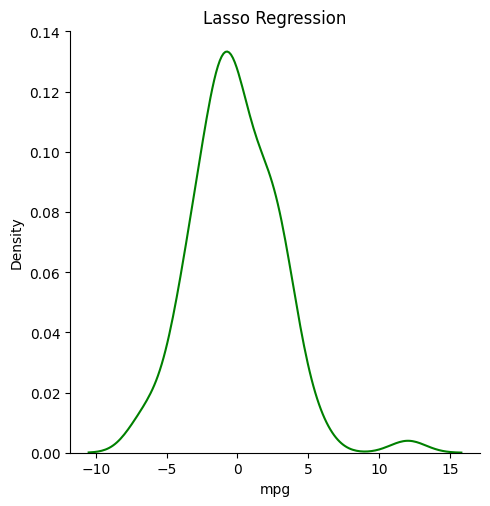

In [40]:
sns.displot(y_test - y_predictions_lasso, kind='kde', color = 'green')
plt.title('Lasso Regression')
plt.show()

Evaluating model performance for lasso regression

In [42]:
mse_lasso = mean_squared_error(y_true = y_test, y_pred = y_predictions_lasso)
r2_lasso = r2_score(y_true = y_test, y_pred = y_predictions_lasso)

print(f"Mean Squared Error for Lasso Regression: {mse_lasso}")
print(f"R-squared Score for Lasso Regression: {r2_lasso}")

Mean Squared Error for Lasso Regression: 9.010470539545642
R-squared Score for Lasso Regression: 0.8324146082370263


Using GridSearchCV to find the best combination of parameters that make the model perform best

In [56]:
paramters = {'alpha':np.logspace(-4,2,100)}
lassocv = GridSearchCV(lasso_regressor, param_grid=paramters, scoring='neg_mean_squared_error', cv=5)

In [58]:
lassocv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1....
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [59]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': np.float64(0.01747528400007685)}
-11.987055967820211


In [60]:
y_predictions_lasso_grscv = lassocv.predict(X_test_scaled)

In [61]:
y_predictions_lasso_grscv

array([32.26749621, 29.30739006, 21.10992341, 16.92968129, 12.54456994,
       26.60668301, 27.67703227,  9.82179684, 16.95326355, 21.66884664,
       12.85154211, 35.74505129, 24.68827781, 13.7754037 , 23.52972691,
        6.38597177, 29.35263922, 25.01175855, 16.43957194, 35.84549706,
       24.58679339, 18.72101941, 28.71091859, 28.47751997, 14.97523816,
       35.64651894, 26.50205097, 24.59017617, 21.81849215,  8.74739082,
       28.20032962, 36.01767967, 20.53119251, 25.47378253, 33.78306227,
       12.18225071, 22.87752215, 21.93408779, 12.41526843, 27.75654061,
       26.31742405, 28.26719583, 21.17519901,  7.36633889, 23.94351834,
       34.54216695, 27.73761821, 25.30999697, 23.44188391, 28.57040152,
       22.12570383, 33.19670345, 32.17211461, 10.96612097, 27.81667262,
        9.96252027, 19.88493759, 29.39289606, 22.72096946, 20.25329089,
       16.30864631, 31.45608877, 23.60998441, 21.38425127, 20.72002144,
       24.91129609, 24.74962657, 32.14785941, 27.63768599, 12.70

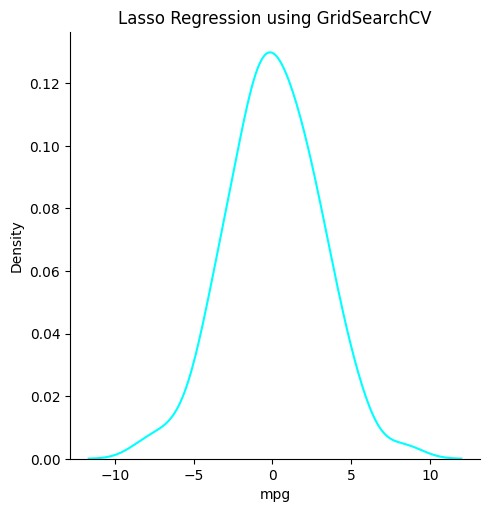

In [63]:
sns.displot(y_test - y_predictions_lasso_grscv, kind='kde', color= 'cyan')
plt.title('Lasso Regression using GridSearchCV')
plt.show()

In [64]:
mse_lassocv = mean_squared_error(y_true = y_test, y_pred = y_predictions_lasso_grscv)
r2_lassocv = r2_score(y_true = y_test, y_pred = y_predictions_lasso_grscv)

print(f"Mean Squared Error for Ridge Regression using GridSearchCV: {mse_lassocv}")
print(f"R-squared Score for Ridge Regression using GridSearchCV: {r2_lassocv}")

Mean Squared Error for Ridge Regression using GridSearchCV: 8.452578518639413
R-squared Score for Ridge Regression using GridSearchCV: 0.842790820275529
